In [2]:
import sys
if ".." not in sys.path:
    sys.path.append("..")

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

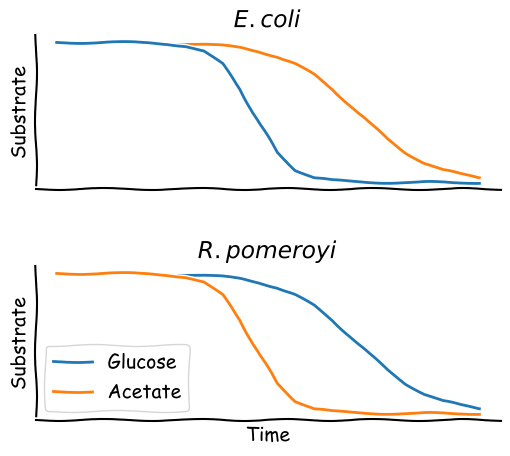

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

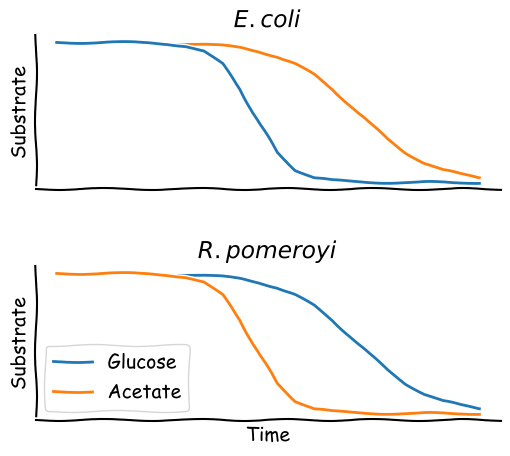

In [3]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 24, 1)
glc_ecoli = 1 / (1 + 0.5*np.exp(t - 10))
ace_ecoli = 1 / (1 + 0.5*np.exp(0.5*(t - 15)))

glc_rpom = 1 / (1 + 0.5*np.exp(0.5*(t - 15)))
ace_rpom = 1 / (1 + 0.5*np.exp((t - 10)))

with plt.xkcd():
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t, ace_ecoli, label="Acetate", color="tab:orange")
    ax1.plot(t, glc_ecoli, label="Glucose", color="tab:blue")

    ax2.plot(t, glc_rpom, label="Glucose")
    ax2.plot(t, ace_rpom, label="Acetate")
    
    # Styling
    ax1.set_title(r"$\it{E. coli}$")
    ax2.set_title(r"$\it{R. pomeroyi}$")
    ax1.set_ylabel("Substrate")
    ax2.set_ylabel("Substrate")
    ax2.set_xlabel("Time")

    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    ax2.legend()

fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(6, 5)
fig

In [4]:
import pandas as pd 

varma = pd.read_csv("varma_et_al_1994_fig7.tsv", sep="\t")
varma.head()

,Time (hr),X (g/L),Ac (mM),Glc (mM)
0,0.00,0.010,0.33,10.80
1,1.70,0.012,0.41,10.75
2,2.53,0.023,0.45,10.39
3,3.01,0.032,0.51,10.15
4,3.51,0.048,0.63,10.03


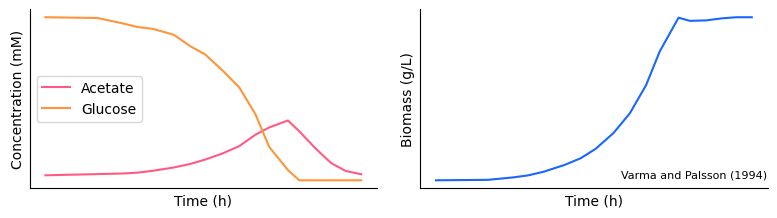

In [5]:
from utils.colors import C_BIOMASS, C_ACETATE, C_GLUCOSE

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(varma["Time (hr)"], varma["Ac (mM)"], label="Acetate", color=C_ACETATE)
ax1.plot(varma["Time (hr)"], varma["Glc (mM)"], label="Glucose", color=C_GLUCOSE)
ax2.plot(varma["Time (hr)"], varma["X (g/L)"], label="Biomass", color=C_BIOMASS)
ax2.text(1, 0.05, "Varma and Palsson (1994)", transform=ax2.transAxes, ha="right", va="bottom", fontsize=8)

for ax in (ax1, ax2):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("Time (h)")

ax1.legend(loc="center left")
ax1.set_ylabel("Concentration (mM)")
ax2.set_ylabel("Biomass (g/L)")

fig.tight_layout()
fig.set_size_inches(8, 2)
fig.savefig("varma_et_al_1994_fig7.svg")
fig

In [6]:
# Load R pom growth data from dFBA
DATA_FILE = "../data/clean/CUE2/dFBA.pkl"

import pickle
with open(DATA_FILE, "rb") as f:
    data = pickle.load(f)

# pick the condition with 4a 8g
data = data[[(g, a) for (g, a) in data.keys() if 7 < g.magnitude * 6 < 9][0]]

rpom_xt = data["mean"]["b_t"]
rpom_x = data["mean"]["b_s"]

rpom_at = data["mean"]["a_t"]
rpom_a = data["mean"]["a_s"]

rpom_gt = data["mean"]["g_t"]
rpom_g = data["mean"]["g_s"]

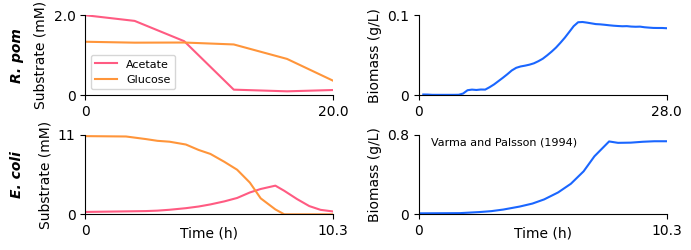

In [10]:
import seaborn as sns

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axs = plt.subplots(2, 2)

((ax1, ax2), (ax3, ax4)) = axs

ax1.plot(rpom_at, rpom_a, label="Acetate", color=C_ACETATE)
ax1.plot(rpom_gt, rpom_g, label="Glucose", color=C_GLUCOSE)
ax2.plot(rpom_xt, rpom_x, label="Biomass", color=C_BIOMASS)

ax3.plot(varma["Time (hr)"], varma["Ac (mM)"], label="Acetate", color=C_ACETATE)
ax3.plot(varma["Time (hr)"], varma["Glc (mM)"], label="Glucose", color=C_GLUCOSE)
ax4.plot(varma["Time (hr)"], varma["X (g/L)"], label="Biomass", color=C_BIOMASS)
ax4.text(0.05, 0.97, "Varma and Palsson (1994)", transform=ax4.transAxes, ha="left", va="top", fontsize=8)

for ax in axs.flat:
    _, maxx = ax.xaxis.get_data_interval()
    _, maxy = ax.yaxis.get_data_interval()
    maxy = np.ceil(10 * maxy) / 10
    if maxy > 10:
        maxy = np.ceil(maxy)
    
    ax.set_xticks([0, maxx], [0, f"{maxx:.1f}"])
    ax.set_yticks([0, maxy], [0, f"{maxy:.1f}" if maxy < 10 else f"{maxy:.0f}"])
    ax.set_xlim(0, maxx)
    ax.set_ylim(0, maxy)
    sns.despine(ax=ax, offset=0)
    

ax1.text(-0.275, 0.5, "R. pom", transform=ax1.transAxes, rotation=90, ha="center", va="center", fontsize=10, style="italic", fontweight="bold")
ax3.text(-0.275, 0.5, "E. coli", transform=ax3.transAxes, rotation=90, ha="center", va="center", fontsize=10, style="italic", fontweight="bold")

ax1.legend(loc="lower left")
ax1.set_ylabel("Substrate (mM)")
ax2.set_ylabel("Biomass (g/L)")

# ax3.legend(loc="center left")
ax3.set_ylabel("Substrate (mM)")
ax4.set_ylabel("Biomass (g/L)")

# Create axis labels with custom distance from axis
for bottom_ax in (ax3, ax4):
    minx, maxx = bottom_ax.xaxis.get_data_interval()
    bottom_ax.set_xticks([(minx + maxx) / 2], ["Time (h)"], minor=True)
    bottom_ax.tick_params(axis="x", which="minor", length=5, width=0)


fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(7, 2.25)
fig.savefig("schematic.svg")
fig